In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import scipy
from scipy import stats
from scipy.signal import find_peaks

array([0.08228, 0.23655, 0.38054, 0.5451 , 0.68909, 0.84336, 0.98735,
       1.14162, 1.2959 , 1.43988, 1.60444, 1.74843, 1.89242, 2.04669,
       2.20097, 2.34496])

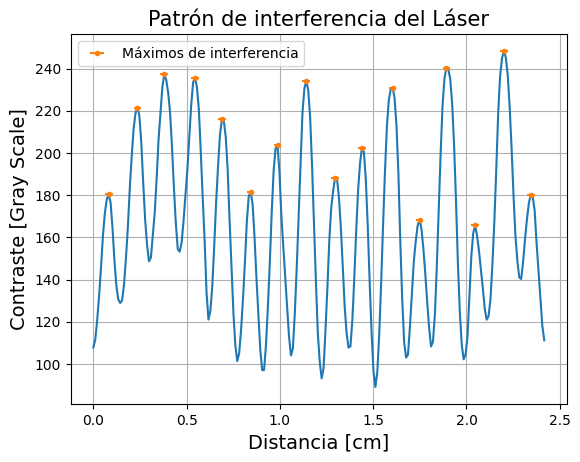

In [ ]:
gsheet = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTP__wnt6IuFKMa0XSnFnwGhiSH6ghlGFvFZFLojRDNA8_7kv309GAR4LzCxX56WcbcuXB7zfMXEkU_/pub?gid=1041060932&single=true&output=csv"
datos = pd.read_csv(gsheet,decimal='.')
x = datos['Distance_(cm)'].to_numpy()
I = datos['Gray_Value'].to_numpy()

max, _ = find_peaks(I, 15)
#max=max[7:-2]
#max = max[1:]
x_max_err = np.diff(x)[0]*2

plt.plot(x,I)
plt.errorbar(x[max], I[max], xerr=x_max_err, fmt='.', label='Máximos de interferencia')
#plt.xlim(0.95,2.15)
plt.title('Patrón de interferencia del Láser', fontsize=15)
plt.xlabel('Distancia [cm]', fontsize=14)
plt.ylabel('Contraste [Gray Scale]', fontsize=14)
plt.grid()
plt.legend()
x[max]

In [ ]:
def lineal(x, a, b):
  return a*x+b

(None, <matplotlib.legend.Legend at 0x7c7f4919bfa0>)

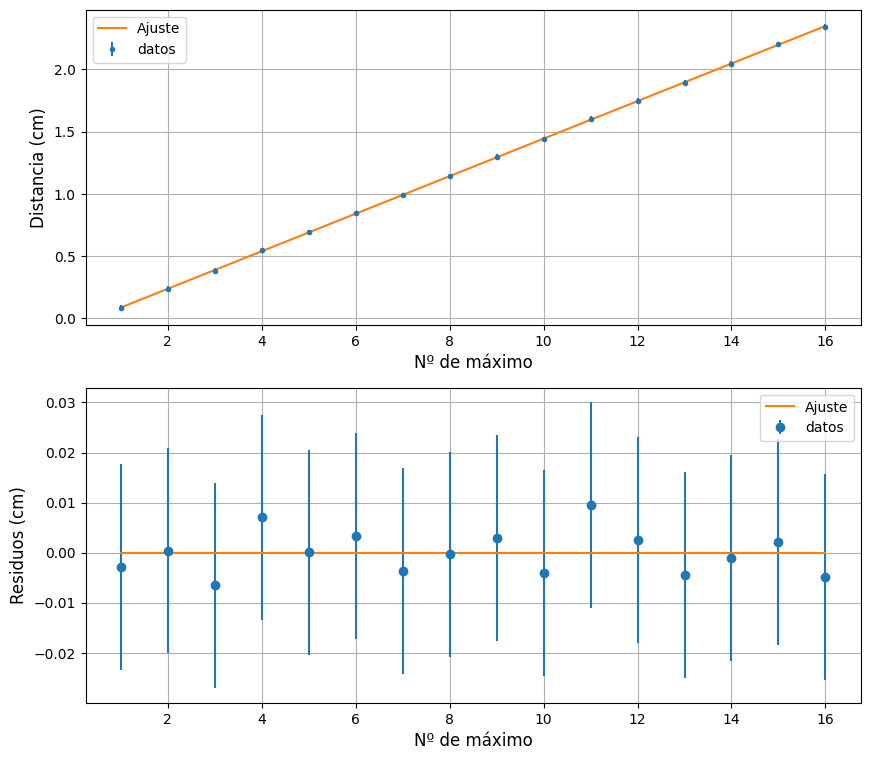

In [ ]:
m = np.linspace(1, 16, 16)

params, cov = curve_fit(lineal, m, x[max], sigma=x_max_err*np.ones(len(m)), absolute_sigma=True)
err = np.sqrt(np.diag(cov))
x_fit = lineal(m, params[0], params[1])

plt.figure(figsize=(10,9))
ax1 = plt.subplot(2,1,1)
plt.errorbar(m, x[max], yerr=x_max_err, fmt='.', label='datos')
plt.plot(m, x_fit, label = 'Ajuste')
plt.xlabel('Nº de máximo', fontsize=12)
plt.ylabel('Distancia (cm)', fontsize=12)
plt.grid(), plt.legend()

params, err

#plt.figure(figsize=(10,5))
plt.subplot(2,1,2, sharex=ax1)
plt.errorbar(m, x[max]-x_fit, yerr=x_max_err, fmt='o', label='datos')
plt.plot(m, x_fit - x_fit, label = 'Ajuste')
plt.xlabel('Nº de máximo', fontsize=12)
plt.ylabel('Residuos (cm)', fontsize=12)
plt.grid(), plt.legend()

In [ ]:
#Metricas de bondad
from scipy.stats import pearsonr
rp = pearsonr(m, x[max])[0]
chi2 = scipy.stats.chisquare(f_obs=x[max], f_exp=x_fit)
corr_matrix = np.corrcoef(x[max], x_fit)
corr = corr_matrix[0,1]
R_sq = corr**2

rp, chi2, R_sq

NameError: ignored

Text(0.5, 0, 'Longitud [nm]')

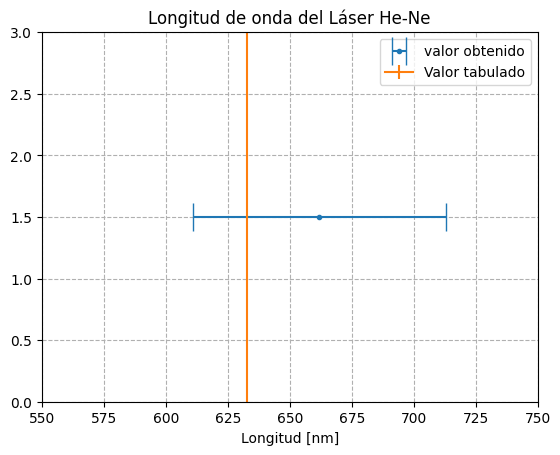

In [ ]:
plt.figure()
plt.errorbar(x=662, y=1.5, xerr=51, capsize=10, fmt = '.', label='valor obtenido')
plt.errorbar(x=632.8, y=1.5, yerr=1.5, label='Valor tabulado')
plt.title("Longitud de onda del Láser He-Ne")
plt.grid(linestyle='--'), plt.ylim(0,3), plt.legend(), plt.xlim(550, 750)
plt.xlabel("Longitud [nm]")

bebita probando cosas


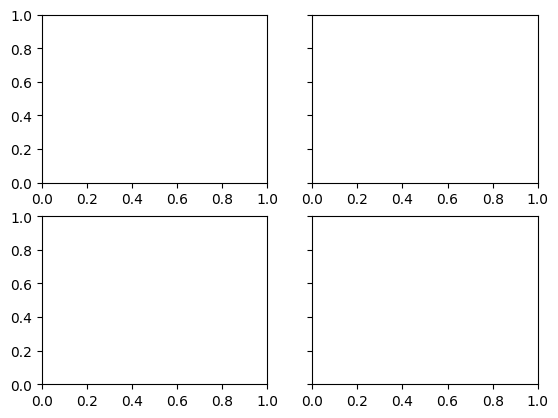

In [ ]:
fig, ax = plt.subplots(2, 2, sharey = True)